In [8]:
using Glob
using Dates
using DIVAnd
using NCDatasets
using GeoDatasets
using CairoMakie, GeoMakie
using JupyterFormatter
enable_autoformat()
include("./config.jl")

make_histogram (generic function with 1 method)

In [25]:
topofile = "/home/ctroupin/data/GEBCO/gebco_30sec_16.nc"
bx, by, b = DIVAnd.extract_bath(topofile, true, lonr, latr)
b[b.<0.0] .= NaN;

lon_landsea, lat_landsea, landsea = GeoDatasets.landseamask(; resolution = 'i', grid = 5)
landsea[landsea.==2] .= 1;

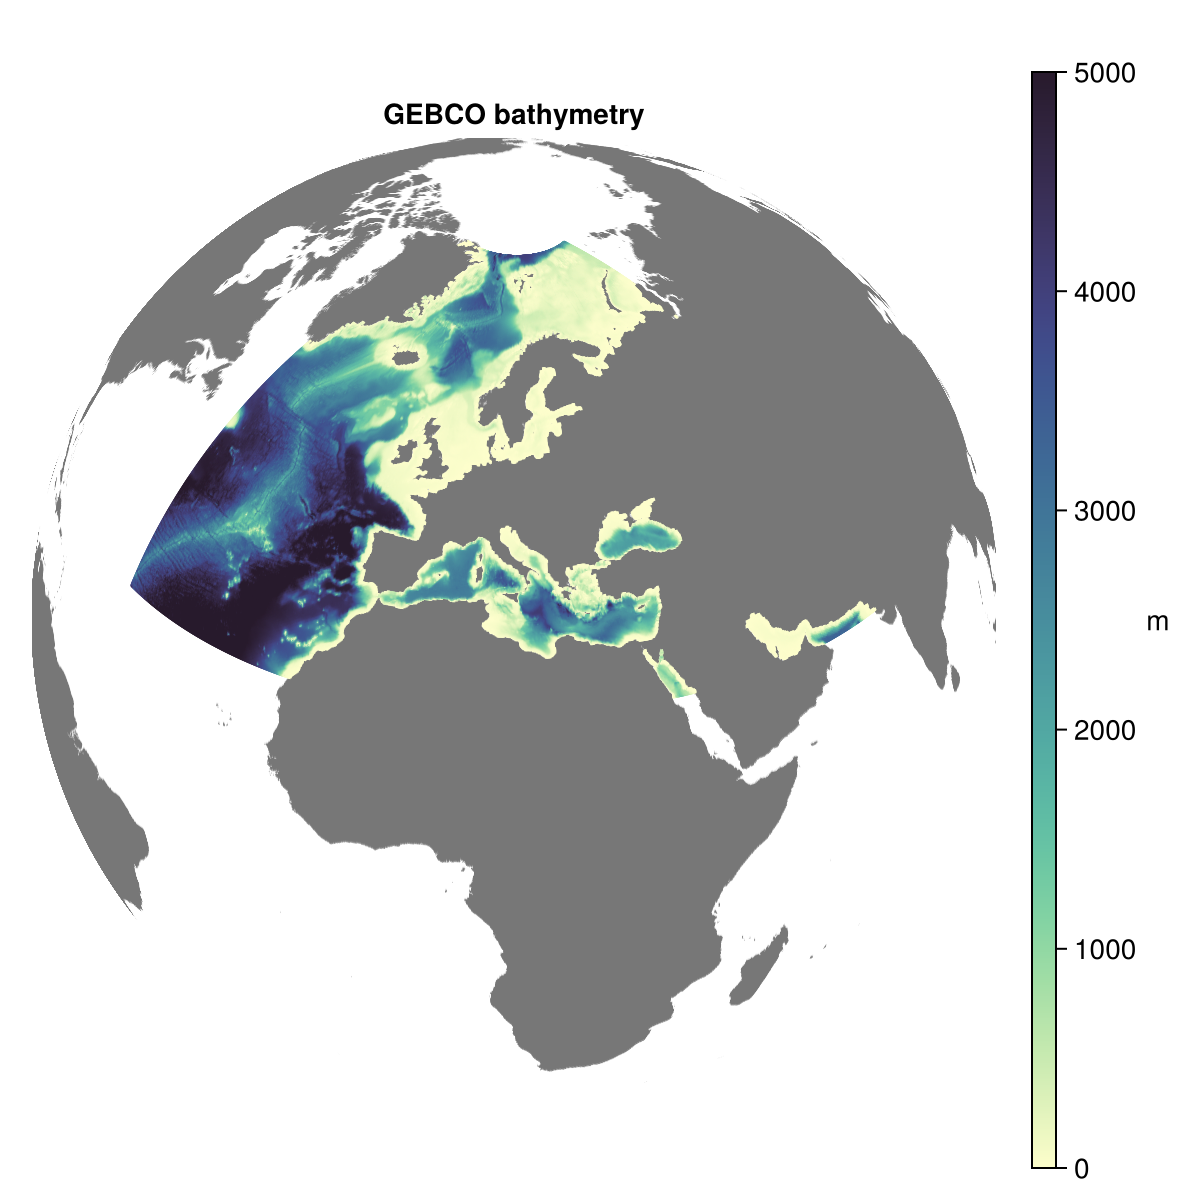

In [30]:
fig = Figure(size = (600, 600))
ga =
    GeoAxis(fig[1, 1], title = "GEBCO bathymetry", dest = "+proj=ortho +lon_0=15 +lat_0=35")
heatmap!(
    ga,
    lon_landsea,
    lat_landsea,
    landsea,
    colormap = Reverse(:greys),
    colorrange = [0, 2],
)
hm = heatmap!(ga, bx, by, b, colormap = :deep, colorrange = (0, 5000.0))
xlims!(ga, -180, 180.0)
ylims!(ga, -90.0, 90.0)
hidedecorations!(ga)
Colorbar(fig[1, 2], hm, label = "m", labelrotation = 0)
save(joinpath(figdir, "gebco_bathy.png"), fig)
fig